# Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [2]:
import pandas as pd

In [26]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [27]:
def rating_assignment(row):
    if row['rating'] <= 2:
        return 'low rating'
    elif row['rating'] <= 4:
        return 'medium rating'
    else:
        return 'high rating'

In [29]:
ratings['class'] = ratings.apply(rating_assignment, axis=1)
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,medium rating
1,1,3,4.0,964981247,medium rating
2,1,6,4.0,964982224,medium rating
3,1,47,5.0,964983815,high rating
4,1,50,5.0,964982931,high rating


# Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

In [216]:
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [217]:
keywords = pd.read_csv('Desktop/keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [218]:
def region_detection(row):
    for j in list(geo_data.keys()):
        for i in range(0, len(geo_data[j])):
            if geo_data[j][i] in row['keyword']:
                return j
            else:
                continue

In [219]:
keywords['region'] = keywords.apply(region_detection, axis=1)
keywords.head()

,keyword,shows,region
0,вк,64292779,None
1,одноклассники,63810309,None
2,порно,41747114,None
3,ютуб,39995567,None
4,вконтакте,21014195,None


In [220]:
keywords[keywords['keyword'] == 'москва погода']

,keyword,shows,region
8132,москва погода,151701,Центр


In [234]:
keywords[keywords['keyword'] == 'сахалин']

,keyword,shows,region
21445,сахалин,14494,Дальний Восток


# Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
        1. для каждой строки пройдите по всем годам списка years
        2. если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
        3. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
joined = ratings.merge(movies, on='movieId', how='left')
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [15]:
import datetime
year = datetime.datetime.today().year
years = list(range(year - 9, year - 70, -1))

In [32]:
def production_year(row):
    for i in years:
        if str(i) in row['title']:
            return int(i)
        else:
            continue

In [36]:
joined['year'] = joined.apply(production_year, axis=1)
joined.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1995.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0


In [40]:
joined['year'].fillna(1990, inplace = True)
joined.tail()

,userId,movieId,rating,timestamp,title,genres,year
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,1990.0
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,1990.0
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,1990.0
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,1990.0
100835,610,170875,3.0,1493846415,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,1990.0


In [54]:
results = joined.groupby('year').agg({'rating': 'mean'})
results = results.reset_index()
results.head()

,year,rating
0,1950.0,3.813665
1,1951.0,3.804945
2,1952.0,3.953125
3,1953.0,3.647059
4,1954.0,4.009191


In [51]:
import seaborn as sns

Похоже, что действительно раньше снимали настоящее кино, не то что сейчас:


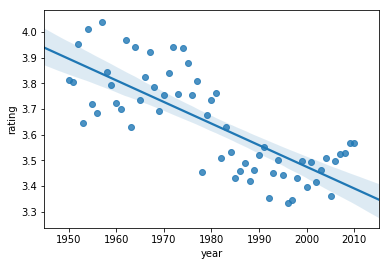

In [57]:
sns.regplot(x='year',y='rating',data=results, fit_reg=True) 
print('Похоже, что действительно раньше снимали настоящее кино, не то что сейчас:')